In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
import os
os.listdir('./')

['.git',
 'onnx_infer.py',
 'val.py',
 'utils',
 'classifier',
 '.gitignore',
 'README.md',
 'regressor',
 'eda.ipynb',
 'assets',
 'onnx_convert.py']

In [2]:
ver1 = pd.read_csv('./assets/v1/dataset_v1.csv')
ver1_train = pd.read_csv('./assets/v1/train.csv')
ver1_test = pd.read_csv('./assets/v1/test.csv')
ver1_val = pd.read_csv('./assets/v1/val.csv')

ver2 = pd.read_csv('./assets/v2/dataset_v2.csv')
ver2_train = pd.read_csv('./assets/v2/train.csv')
ver2_test = pd.read_csv('./assets/v2/test.csv')
ver2_val = pd.read_csv('./assets/v2/val.csv')

In [30]:
ver2_val['label'].value_counts(normalize=True)

label
1    0.385584
0    0.311213
2    0.303204
Name: proportion, dtype: float64

In [25]:
ver2['label'].value_counts(normalize=True)

label
1    0.385923
0    0.310901
2    0.303176
Name: proportion, dtype: float64

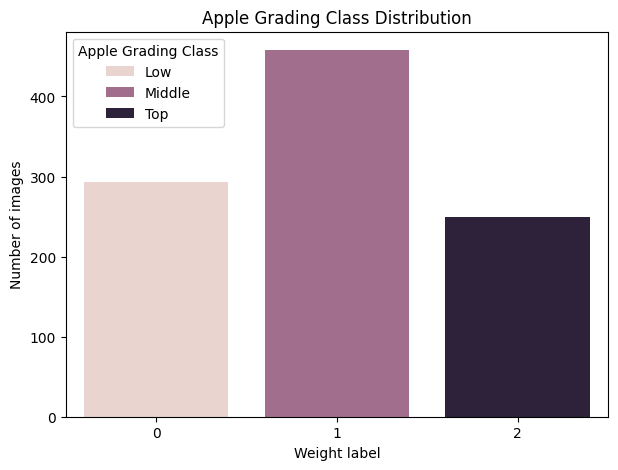

In [36]:
# showing distribution of the `label` column by visualing with seaborn library
fig, ax = plt.subplots(figsize=(7, 5))
sns.countplot(x='label', hue='label', data=ver1, ax=ax)

plt.title('Apple Grading Class Distribution')
plt.legend(title='Apple Grading Class', loc='upper left', labels=['Low', 'Middle', 'Top'])
plt.xlabel('Weight label')
plt.ylabel('Number of images')
plt.show()

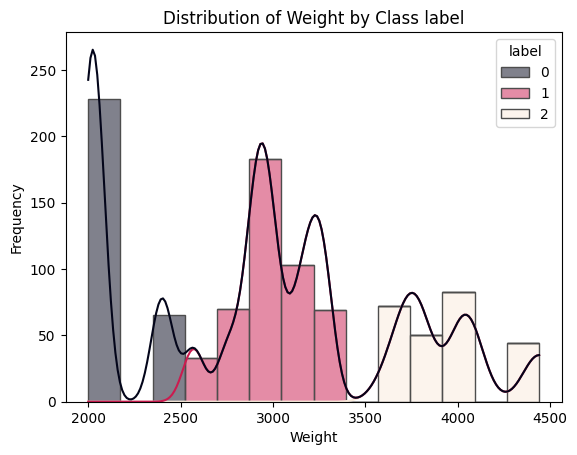

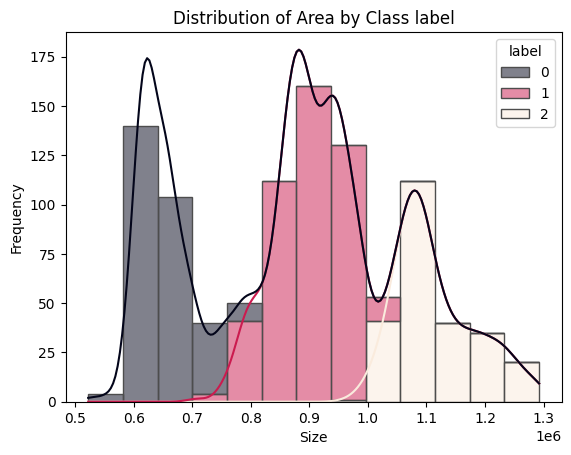

In [37]:
# Univariate analysis of weight
sns.histplot(data=ver1, x="weight", hue="label", kde=True, multiple="stack", palette="rocket", edgecolor=".3")
plt.title('Distribution of Weight by Class label')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

# Univariate analysis of size
sns.histplot(data=ver1, x="area", hue="label", kde=True, multiple="stack", palette="rocket", edgecolor=".3")
plt.title('Distribution of Area by Class label')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()


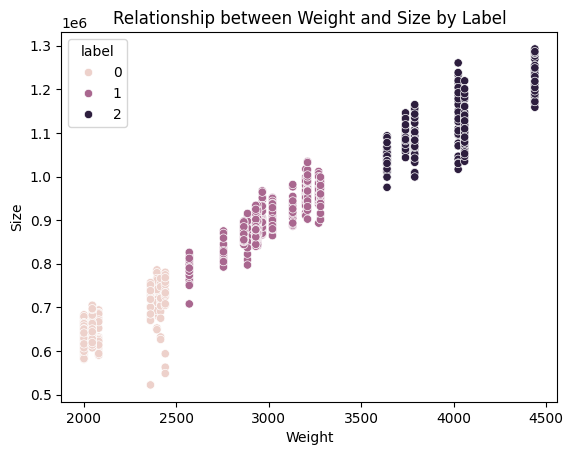

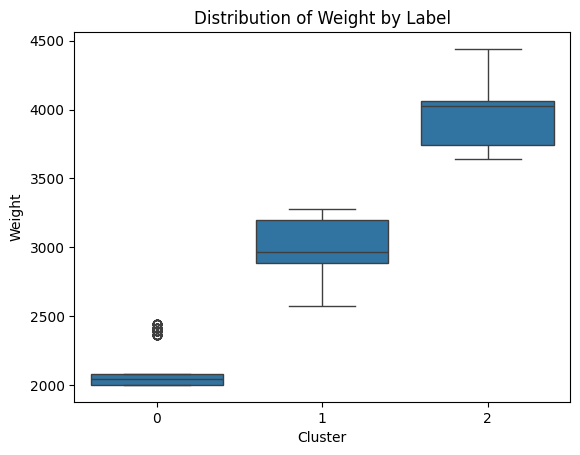

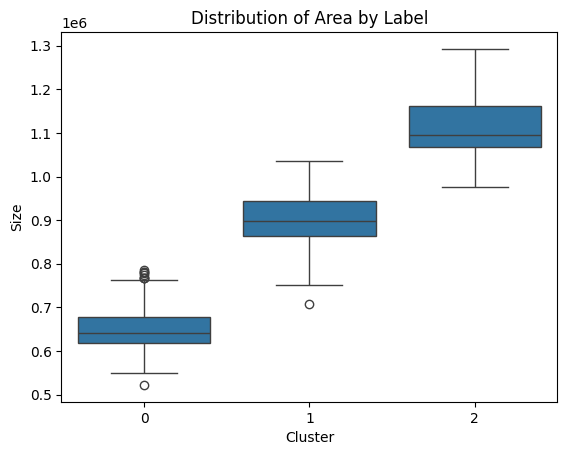

In [38]:
# Bivariate analysis of weight and size by cluster
sns.scatterplot(data=ver1, x="weight", y="area", hue="label")
plt.title('Relationship between Weight and Size by Label')
plt.xlabel('Weight')
plt.ylabel('Size')
plt.show()

# Box plot of weight by cluster
sns.boxplot(data=ver1, x="label", y="weight")
plt.title('Distribution of Weight by Label')
plt.xlabel('Cluster')
plt.ylabel('Weight')
plt.show()

# Box plot of size by cluster
sns.boxplot(data=ver1, x="label", y="area")
plt.title('Distribution of Area by Label')
plt.xlabel('Cluster')
plt.ylabel('Size')
plt.show()


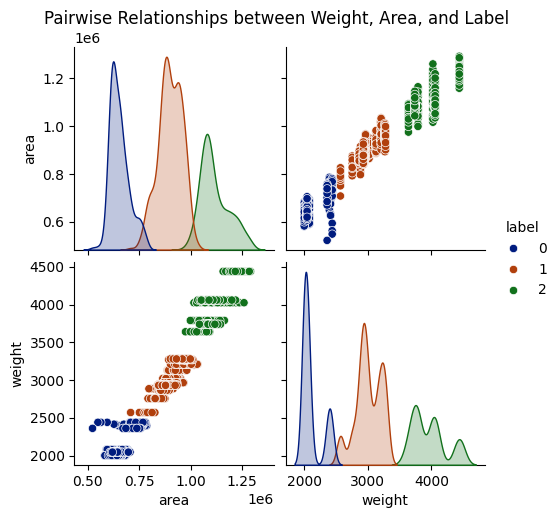

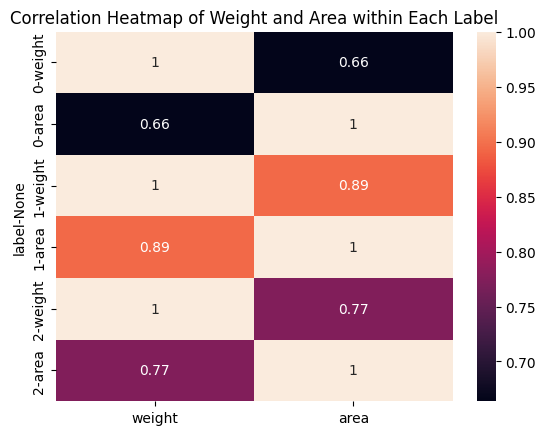

In [39]:
# Pairwise relationships between weight, size, and cluster
sns.pairplot(ver1, hue="label", palette="dark")
plt.suptitle('Pairwise Relationships between Weight, Area, and Label', y=1.02)
plt.show()

# Heatmap to visualize correlations between weight and size within each cluster
correlation_matrix = ver1.groupby('label')[['weight', 'area']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="rocket")
plt.title('Correlation Heatmap of Weight and Area within Each Label')
plt.show()


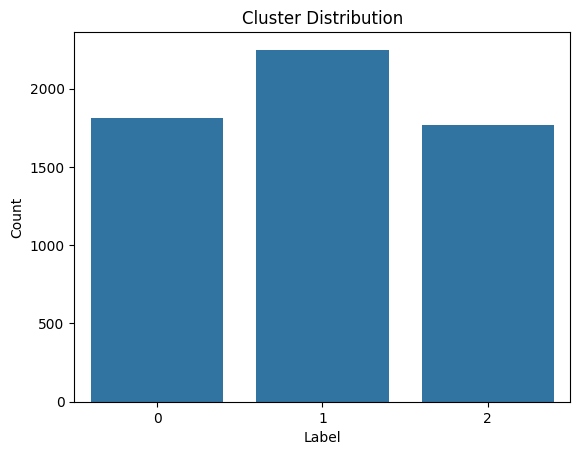

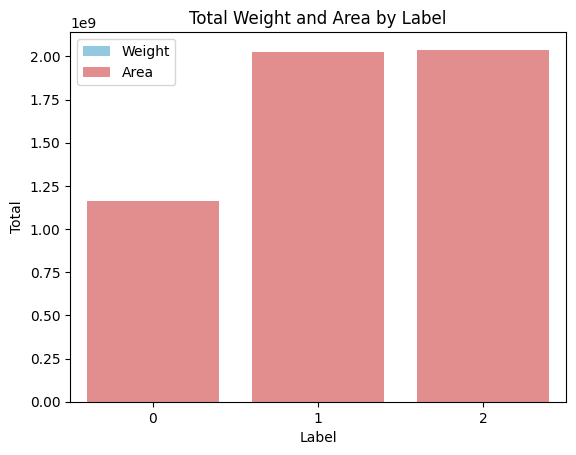

In [33]:
# Count plot of cluster distribution
sns.countplot(data=ver2, x="label")
plt.title('Cluster Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Stacked bar plot of weight and size by cluster
sns.barplot(data=ver2, x="label", y="weight", estimator=sum, errorbar=None, color="skyblue", label="Weight")
sns.barplot(data=ver2, x="label", y="area", estimator=sum, errorbar=None, color="lightcoral", label="Area")
plt.title('Total Weight and Area by Label')
plt.xlabel('Label')
plt.ylabel('Total')
plt.legend()
plt.show()


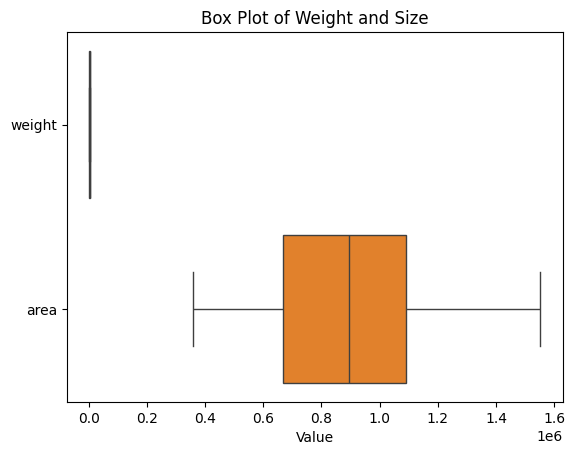

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot of weight and size to identify outliers
sns.boxplot(data=ver2[['weight', 'area']], orient="h")
plt.title('Box Plot of Weight and Size')
plt.xlabel('Value')
plt.show()
